# Plotting oligometastasis intervention benefits

We're going to plot some oligometastasis growth curves. All models are wrong. This is no exception, but it might be useful. 

Code written by Jacob Scott and Jessica Scarborough. 

## Document and filepath setup

In [1]:
import pylab
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import LogNorm
import numpy as np
from math import log as ln
from pylab import rcParams
from scipy.integrate import odeint
import pandas as pd
from tabulate import tabulate
import seaborn as sns

In [2]:
plot_path = '../plots/'

## Build exponential growth curves

### Parameter Space

In [3]:
total_t = int(1.3*10**3)
end_time = int(1.3*10**3)
tumor_doubling_time = [150, 125, 300, 400]  #comment for pcolor, use for surface
# tumor_doubling_time = [120, 150, 300, 400]  #comment for pcolor, use for surface
r = [ln(2) / tumor_doubling_time[i] for i in range(len(tumor_doubling_time))]
print(r)
N_c = [5]

[0.0046209812037329686, 0.005545177444479563, 0.0023104906018664843, 0.0017328679513998633]


### X-axis (timepoints)

In [4]:
t0 =  np.linspace(0, end_time, total_t)
t =  np.linspace(0, end_time, total_t)
t1 = np.linspace(int((3/8)*end_time), end_time, int((5/8)*total_t)) # Create a vector or time points beginning 3/8 of the way through to the final time point
t2 = np.linspace(int((1/2)*end_time), end_time, int((1/2)*total_t))
t3 = np.linspace(int((5/8)*end_time), end_time, int((3/8)*total_t))

### Y-axis (tumor size)

In [5]:
N0 = [100 for i in range(total_t)]

N = [np.exp(r[0]*t[i]) for i in range(total_t)] # build baseline growth curve
# print(N)
N1 = [(N[int((3/8)*total_t)] - N_c) * np.exp(r[0]*t[i]) for i in range(int((5/8)*total_t))] #  Create a growth curve with a starting population of 5 less individuals (Nc) 3/8ths of the way to total time
N2 = [(N[int((1/2)*total_t)] - N_c) * np.exp(r[0]*t[i]) for i in range(int((1/2)*total_t))]
N3 = [(N[int((5/8)*total_t)] - N_c) * np.exp(r[0]*t[i]) for i in range(int((3/8)*total_t))]

N_fast = [np.exp(r[1]*t[i]) for i in range(total_t)]
N1_fast = [(N_fast[int((3/8)*total_t)] - N_c) * np.exp(r[1]*t[i]) for i in range(int((5/8)*total_t))]
N2_fast = [(N_fast[int((1/2)*total_t)] - N_c) * np.exp(r[1]*t[i]) for i in range(int((1/2)*total_t))]
N3_fast = [(N_fast[int((5/8)*total_t)] - N_c) * np.exp(r[1]*t[i]) for i in range(int((3/8)*total_t))]

# print(N[int(total_t/4)] - N_c,N[int(total_t/2)] - N_c, N[int(3*total_t/4)] - N_c)

## Plot exponential growth curves

First, we'll build 4 exponential growth curves with the same growth rate, each with treatment occuring at a different timepoint. This corresponds to Figure 1. 

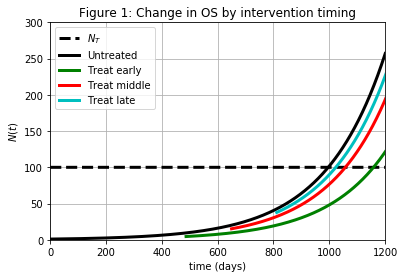

In [6]:
plt.plot(t0,N0, c = 'k', linestyle = '--',label='$N_T$',linewidth = 3.0)
plt.plot(t,N, c = 'k', label='Untreated',linewidth = 3.0)
plt.plot(t1,N1, c = 'g', label='Treat early',linewidth = 3.0)
plt.plot(t2,N2, c = 'r', label='Treat middle',linewidth = 3.0)
plt.plot(t3,N3, c = 'c', label='Treat late',linewidth = 3.0)
plt.title("Figure 1: Change in OS by intervention timing")
plt.xlabel('time (days)')
plt.ylabel('$N(t)$')
plt.grid()
plt.xlim((0,1200))
plt.ylim((0,300))
plt.legend(loc = 2)



plt.savefig(plot_path+'oligomets_curves.png', dpi = 500)

### Adjust growth rate ($r$)

Now, let's see how a change in growth rate effects OS changes

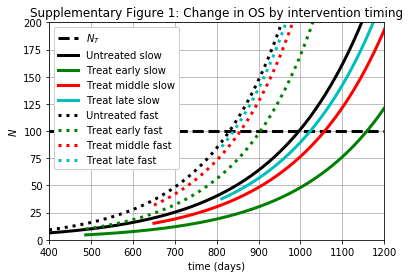

In [7]:
plt.plot(t0,N0, c = 'k', linestyle = '--',label='$N_T$',linewidth = 3.0)

plt.plot(t,N, c = 'k', label='Untreated slow',linewidth = 3.0)
plt.plot(t1,N1, c = 'g', label='Treat early slow',linewidth = 3.0)
plt.plot(t2,N2, c = 'r', label='Treat middle slow',linewidth = 3.0)
plt.plot(t3,N3, c = 'c', label='Treat late slow',linewidth = 3.0)

plt.plot(t,N_fast, c = 'k', linestyle = 'dotted', label='Untreated fast', linewidth = 3.0)
plt.plot(t1,N1_fast, c = 'g', linestyle = 'dotted', label='Treat early fast', linewidth = 3.0)
plt.plot(t2,N2_fast, c = 'r', linestyle = 'dotted', label='Treat middle fast', linewidth = 3.0)
plt.plot(t3,N3_fast, c = 'c', linestyle = 'dotted', label='Treat late fast', linewidth = 3.0)

plt.title("Supplementary Figure 1: Change in OS by intervention timing")
plt.xlabel('time (days)')
plt.ylabel('$N$')
plt.grid()

# Change limits based on whether or not you're viewing the entire plot or zooming in

# Zoomed in plot of slow curves
plt.xlim((950,1200)) # zoom slow curves
plt.ylim((80,120)) # zoom slow curves
plt.savefig(plot_path+'oligomets_curves_zoom_slow.png', dpi = 500)

# Zoomed in plot of fast curves
plt.xlim((800,925)) # zoom fast curves
plt.ylim((80,120)) # zoom fast curves
plt.savefig(plot_path+'oligomets_curves_zoom_fast.png', dpi = 500)

# Complete plot
plt.xlim((400,1200))
plt.ylim((0,200))
plt.legend(loc = 2, framealpha=1)
plt.savefig(plot_path+'oligomets_curves_twoR.png', dpi = 500)

# Build alternative ODE growth curves

In [8]:
# initial condition
y1_start = 200
y5_start = 5

# time points
total_t = int(4*10**6) + y1_start
end_time = int(4*10**3) + y1_start

t = np.linspace(0,end_time, total_t)

# Models to return dy/dt
def model_exp(y,t):
#     a = 0.0046209812037329686
#     a = 0.0262
    a = 0.0246
    dydt = a * y
    return dydt

def model_mend(y,t):
#     a = 0.0116209812037329686
#     b = 0.616
#     a = 0.286
#     b = 0.616
    a = 0.105
    b = 0.785
    dydt = a * (y**b)
    return dydt

def model_log(y,t):
#     a = 0.0046209812037329686
#     b = 500
#     a = 0.0370
#     b = 2000
    a = 0.0295
    b = 6920
    dydt = (a * y) * (1-(y/b))
    return dydt

def model_lin(y,t):
#     a = 7
#     b = 1600
#     a = 58.7
#     b = 1690
    a = 132
    b = 4300
    dydt = (a * y) / (y + b)
    return dydt

def model_surface(y,t):
#     a = 0.0365
#     b = 506
#     a = 0.265
#     b = 506
    a = 0.291
    b = 708
    dydt = (a * y) / ((y + b)**(1/3))
    return dydt

def model_gompertz(y,t):
#     a = 0.11
#     b = 11500
#     c = 11000
#     a = 0.279
#     b = 13900
#     c = 12000
    a = 0.0919
    b = 15500
    c = 10700
    dydt = (a * y) * (ln(b/(y + c)))
    return dydt

def model_bertalanffy(y,t):
#     r = 0.91
#     b = 0.05
#     a = 0.306
#     b = 0.0119
    a = 0.234
    b = 3.46 * 10**-19
    dydt = (a * y**(2/3)) - (b * y)
    return dydt



# solve ODEs
y_exp = odeint(model_exp,y1_start,t)
y_mend = odeint(model_mend,y1_start,t)
y_log = odeint(model_log,y1_start,t)
y_lin = odeint(model_lin,y1_start,t)
y_surf = odeint(model_surface,y1_start,t)
y_gomp = odeint(model_gompertz,y1_start,t)
y_bert = odeint(model_bertalanffy,y1_start,t)

## Plot all ODE growth curves

For a sensitivity analysis, let's take a look at a vareity of ODE tumor growth models, selected from [Murphy et al, 2016](https://bmccancer.biomedcentral.com/track/pdf/10.1186/s12885-016-2164-x). 

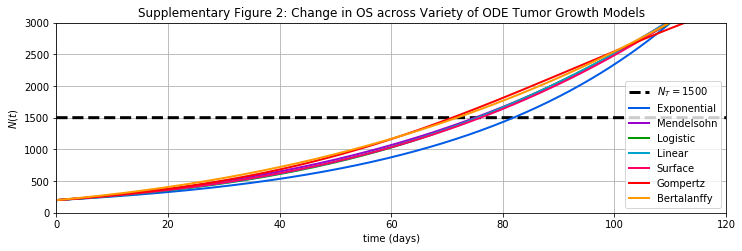

In [9]:
# total_t = int(4*10**3)
# end_time = int(4*10**3)
N1500 = [1500 for i in range(total_t)] # straight line, denoting tumor burden leading to mortality

plt.figure(figsize=(12,3.5))
plt.plot(t,N1500, c = 'k', linestyle = '--',label='$N_T=1500$',linewidth = 3.0)
plt.plot(t,y_exp, label = "Exponential", linewidth = 2, c = '#005ce6')
plt.plot(t,y_mend, label = "Mendelsohn", linewidth = 2, c = '#9900cc')
plt.plot(t,y_log, label = "Logistic", linewidth = 2, c = '#009900')
plt.plot(t,y_lin, label = "Linear", linewidth = 2, c = '#00a3cc')
plt.plot(t,y_surf, label = "Surface", linewidth = 2, c = '#ff0066')
plt.plot(t,y_gomp, label = "Gompertz", linewidth = 2, c = '#ff0000')
plt.plot(t,y_bert, label = "Bertalanffy", linewidth = 2, c = '#ff9900')
plt.title("Supplementary Figure 2: Change in OS across Variety of ODE Tumor Growth Models")
plt.xlabel('time (days)')
plt.ylabel('$N(t)$')
plt.grid()
plt.xlim((0,120))
plt.ylim((0,3000))
plt.legend(loc = 4)
plt.savefig(plot_path+'ode_spread.png', dpi = 1000)
plt.show()

### Evaluate Individual ODE growth curves

Similar to Figure 1, we're going to demonstrate what a change in treatment timing looks like for various tumor growth models. We'll work through all seven models included in Supplementary Figure 2, above. First, we'll plot each model individually to visually inspect how the same N<sub>c</sub> at different timepoints effects the growth. Then, in order to compare the models numerically, we will store the change in time (days) until the tumor burden threshold (N<sub>T</sub>) is reached in an array. 

We'll begin by initiating an empty pandas dataframe for each tumor burden threshold, N<sub>T</sub>. 

In [10]:
delta_t_N1500 = pd.DataFrame(columns = ["Treat Early", "Treat Middle", "Treat Late"],
                            index = ["Exponential", "Mendelsohn", "Logistic", "Linear", 
                                     "Surface", "Gompertz", "Bertalanffy"])
# delta_t_N2000 = pd.DataFrame(columns = ["Treat Early", "Treat Middle", "Treat Late"],
#                             index = ["Exponential", "Mendelsohn", "Logistic", "Linear", 
#                                      "Surface", "Gompertz", "Bertalanffy"])

#### Plot Exponential

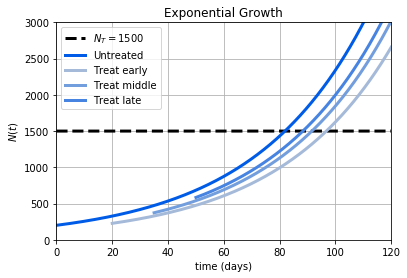

In [11]:
# parameter space 
time_int_early = 20
time_int_mid = 35
time_int_late = 50

N_c = 100

# x-axis (timepoints)
t0 =  np.linspace(0, end_time, total_t)
t =  np.linspace(0, end_time, total_t)
t1 = np.linspace(time_int_early, end_time, int(((total_t-time_int_early)/total_t)*total_t)) # Create a vector or time points beginning after the early intervention of the way through to the final time point
t2 = np.linspace(time_int_mid, end_time, int(((total_t-time_int_mid)/total_t)*total_t))
t3 = np.linspace(time_int_late, end_time, int(((total_t-time_int_late)/total_t)*total_t))

# y-axis (tumor size)
N1500 = [1500 for i in range(total_t)] # straight line, denoting tumor burden leading to mortality

ystart_no_int = 200
N = odeint(model_exp, ystart_no_int, t)

index_t_early = next(x for x, val in enumerate(t) if val > time_int_early)
ystart_early_int = (N[index_t_early] - N_c)
N1 = odeint(model_exp, ystart_early_int, t1)

index_t_middle = next(x for x, val in enumerate(t) if val > time_int_mid)
ystart_middle_int = (N[index_t_middle] - N_c)
N2 = odeint(model_exp, ystart_middle_int, t2)


index_t_late = next(x for x, val in enumerate(t) if val > time_int_late)
ystart_late_int = (N[index_t_late] - N_c)
N3 = odeint(model_exp, ystart_late_int, t3)

# plot

plt.plot(t0,N1500, c = 'k', linestyle = '--',label='$N_T = 1500$',linewidth = 3.0)
plt.plot(t,N, c = '#005ce6', label='Untreated',linewidth = 3.0)
plt.plot(t1,N1, c = '#a5bad9', label='Treat early',linewidth = 3.0)
plt.plot(t2,N2, c = '#739edd', label='Treat middle',linewidth = 3.0)
plt.plot(t3,N3, c = '#4784e1', label='Treat late',linewidth = 3.0)
plt.title("Exponential Growth")
plt.xlabel('time (days)')
plt.ylabel('$N(t)$')
plt.grid()
plt.xlim((0,120))
plt.ylim((0,3000))
plt.legend(loc = 2)



plt.savefig(plot_path+'exp_curves.png', dpi = 500)


#### Find Delta T Exponential

In [12]:
# # For N_T = 1000

# # Find index where N has just surpassed N_T
# index_N_1000 = next(x for x, val in enumerate(N) if val > 1000)
# index_N1_1000 = next(x for x, val in enumerate(N1) if val > 1000)
# index_N2_1000 = next(x for x, val in enumerate(N2) if val > 1000)
# index_N3_1000 = next(x for x, val in enumerate(N3) if val > 1000)

# # Find delta t between each intervention curve and the untreated curve at N_T
# delta_t1_N1000 = t1[index_N1_1000]-t[index_N_1000]
# delta_t2_N1000 = t2[index_N2_1000]-t[index_N_1000]
# delta_t3_N1000 = t3[index_N3_1000]-t[index_N_1000]

# delta_t_N1000.loc['Exponential'] = [delta_t1_N1000, delta_t2_N1000, delta_t3_N1000]


# For N_T = 1500

index_N_1500 = next(x for x, val in enumerate(N) if val > 1500)
index_N1_1500 = next(x for x, val in enumerate(N1) if val > 1500)
index_N2_1500 = next(x for x, val in enumerate(N2) if val > 1500)
index_N3_1500 = next(x for x, val in enumerate(N3) if val > 1500)

delta_t1_N1500 = t1[index_N1_1500]-t[index_N_1500]
delta_t2_N1500 = t2[index_N2_1500]-t[index_N_1500]
delta_t3_N1500 = t3[index_N3_1500]-t[index_N_1500]

delta_t_N1500.loc['Exponential'] = [delta_t1_N1500, delta_t2_N1500, delta_t3_N1500]


print(tabulate(delta_t_N1500, headers='keys', tablefmt='fancy_grid'))



╒═════════════╤═══════════════╤════════════════╤══════════════╕
│             │   Treat Early │   Treat Middle │   Treat Late │
╞═════════════╪═══════════════╪════════════════╪══════════════╡
│ Exponential │       14.8308 │        9.65195 │      6.42153 │
├─────────────┼───────────────┼────────────────┼──────────────┤
│ Mendelsohn  │      nan      │      nan       │    nan       │
├─────────────┼───────────────┼────────────────┼──────────────┤
│ Logistic    │      nan      │      nan       │    nan       │
├─────────────┼───────────────┼────────────────┼──────────────┤
│ Linear      │      nan      │      nan       │    nan       │
├─────────────┼───────────────┼────────────────┼──────────────┤
│ Surface     │      nan      │      nan       │    nan       │
├─────────────┼───────────────┼────────────────┼──────────────┤
│ Gompertz    │      nan      │      nan       │    nan       │
├─────────────┼───────────────┼────────────────┼──────────────┤
│ Bertalanffy │      nan      │      nan

In [13]:
# # Checking the math
# print("N_T = 1000")
# print(t[index_N_1000])
# print("")
# print(t1[index_N1_1000])
# print(delta_t1_N1000)
# print(t2[index_N2_1000])
# print(delta_t2_N1000)
# print(t3[index_N3_1000])
# print(delta_t3_N1000)
# print("")
# print("N_T = 2000")
# print(t[index_N_2000])
# print("")
# print(t1[index_N1_2000])
# print(delta_t1_N2000)
# print(t2[index_N2_2000])
# print(delta_t2_N2000)
# print(t3[index_N3_2000])
# print(delta_t3_N2000)

#### Mendelsohn

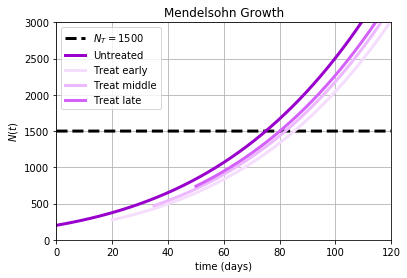

In [14]:
# parameter space 
# time_int_early = 20
# time_int_mid = 35
# time_int_late = 50

N_c = 100

# x-axis (timepoints)
t0 =  np.linspace(0, end_time, total_t)
t =  np.linspace(0, end_time, total_t)
t1 = np.linspace(time_int_early, end_time, int(((total_t-time_int_early)/total_t)*total_t)) # Create a vector or time points beginning after the early intervention of the way through to the final time point
t2 = np.linspace(time_int_mid, end_time, int(((total_t-time_int_mid)/total_t)*total_t))
t3 = np.linspace(time_int_late, end_time, int(((total_t-time_int_late)/total_t)*total_t))

# y-axis (tumor size)
N1500 = [1500 for i in range(total_t)] # straight line, denoting tumor burden leading to mortality


ystart_no_int = 200
N = odeint(model_mend, ystart_no_int, t)

index_t_early = next(x for x, val in enumerate(t) if val > time_int_early)
ystart_early_int = (N[index_t_early] - N_c)
N1 = odeint(model_mend, ystart_early_int, t1)

index_t_middle = next(x for x, val in enumerate(t) if val > time_int_mid)
ystart_middle_int = (N[index_t_middle] - N_c)
N2 = odeint(model_mend, ystart_middle_int, t2)


index_t_late = next(x for x, val in enumerate(t) if val > time_int_late)
ystart_late_int = (N[index_t_late] - N_c)
N3 = odeint(model_mend, ystart_late_int, t3)

plt.plot(t0,N1500, c = 'k', linestyle = '--',label='$N_T = 1500$',linewidth = 3.0)
plt.plot(t,N, c = '#9900cc', label='Untreated',linewidth = 3.0)
plt.plot(t1,N1, c = '#f5ddfd', label='Treat early',linewidth = 3.0)
plt.plot(t2,N2, c = '#edb8ff', label='Treat middle',linewidth = 3.0)
plt.plot(t3,N3, c = '#d461fa', label='Treat late',linewidth = 3.0)
plt.title("Mendelsohn Growth")
plt.xlabel('time (days)')
plt.ylabel('$N(t)$')
plt.grid()
plt.xlim((0,120))
plt.ylim((0,3000))
plt.legend(loc = 2)



plt.savefig(plot_path+'mend_curves.png', dpi = 500)


In [15]:
# # For N_T = 1000

# # Find index where N has just surpassed N_T
# index_N_1000 = next(x for x, val in enumerate(N) if val > 1000)
# index_N1_1000 = next(x for x, val in enumerate(N1) if val > 1000)
# index_N2_1000 = next(x for x, val in enumerate(N2) if val > 1000)
# index_N3_1000 = next(x for x, val in enumerate(N3) if val > 1000)

# # Find delta t between each intervention curve and the untreated curve at N_T
# delta_t1_N1000 = t1[index_N1_1000]-t[index_N_1000]
# delta_t2_N1000 = t2[index_N2_1000]-t[index_N_1000]
# delta_t3_N1000 = t3[index_N3_1000]-t[index_N_1000]

# delta_t_N1000.loc['Mendelsohn'] = [delta_t1_N1000, delta_t2_N1000, delta_t3_N1000]


# For N_T = 1500

index_N_1500 = next(x for x, val in enumerate(N) if val > 1500)
index_N1_1500 = next(x for x, val in enumerate(N1) if val > 1500)
index_N2_1500 = next(x for x, val in enumerate(N2) if val > 1500)
index_N3_1500 = next(x for x, val in enumerate(N3) if val > 1500)

delta_t1_N1500 = t1[index_N1_1500]-t[index_N_1500]
delta_t2_N1500 = t2[index_N2_1500]-t[index_N_1500]
delta_t3_N1500 = t3[index_N3_1500]-t[index_N_1500]

delta_t_N1500.loc['Mendelsohn'] = [delta_t1_N1500, delta_t2_N1500, delta_t3_N1500]

#### Logistic

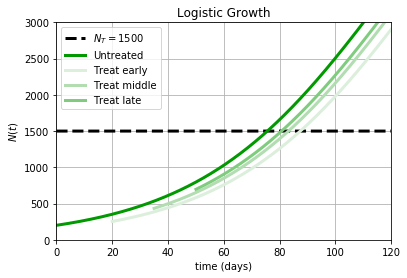

In [16]:
# parameter space 
# time_int_early = 20
# time_int_mid = 35
# time_int_late = 50

N_c = 100

# x-axis (timepoints)
t0 =  np.linspace(0, end_time, total_t)
t =  np.linspace(0, end_time, total_t)
t1 = np.linspace(time_int_early, end_time, int(((total_t-time_int_early)/total_t)*total_t)) # Create a vector or time points beginning after the early intervention of the way through to the final time point
t2 = np.linspace(time_int_mid, end_time, int(((total_t-time_int_mid)/total_t)*total_t))
t3 = np.linspace(time_int_late, end_time, int(((total_t-time_int_late)/total_t)*total_t))

# y-axis (tumor size)
N1500 = [1500 for i in range(total_t)] # straight line, denoting tumor burden leading to mortality


ystart_no_int = 200
N = odeint(model_log, ystart_no_int, t)

index_t_early = next(x for x, val in enumerate(t) if val > time_int_early)
ystart_early_int = (N[index_t_early] - N_c)
N1 = odeint(model_log, ystart_early_int, t1)

index_t_middle = next(x for x, val in enumerate(t) if val > time_int_mid)
ystart_middle_int = (N[index_t_middle] - N_c)
N2 = odeint(model_log, ystart_middle_int, t2)


index_t_late = next(x for x, val in enumerate(t) if val > time_int_late)
ystart_late_int = (N[index_t_late] - N_c)
N3 = odeint(model_log, ystart_late_int, t3)

plt.plot(t0,N1500, c = 'k', linestyle = '--',label='$N_T = 1500$',linewidth = 3.0)
plt.plot(t,N, c = '#009900', label='Untreated',linewidth = 3.0)
plt.plot(t1,N1, c = '#dcefdc', label='Treat early',linewidth = 3.0)
plt.plot(t2,N2, c = '#b1ddb1', label='Treat middle',linewidth = 3.0)
plt.plot(t3,N3, c = '#7fcc7f', label='Treat late',linewidth = 3.0)
plt.title("Logistic Growth")
plt.xlabel('time (days)')
plt.ylabel('$N(t)$')
plt.grid()
plt.xlim((0,120))
plt.ylim((0,3000))
plt.legend(loc = 2)



plt.savefig(plot_path+'log_curves.png', dpi = 500)


In [17]:
# # For N_T = 1000

# # Find index where N has just surpassed N_T
# index_N_1000 = next(x for x, val in enumerate(N) if val > 1000)
# index_N1_1000 = next(x for x, val in enumerate(N1) if val > 1000)
# index_N2_1000 = next(x for x, val in enumerate(N2) if val > 1000)
# index_N3_1000 = next(x for x, val in enumerate(N3) if val > 1000)

# # Find delta t between each intervention curve and the untreated curve at N_T
# delta_t1_N1000 = t1[index_N1_1000]-t[index_N_1000]
# delta_t2_N1000 = t2[index_N2_1000]-t[index_N_1000]
# delta_t3_N1000 = t3[index_N3_1000]-t[index_N_1000]

# delta_t_N1000.loc['Logistic'] = [delta_t1_N1000, delta_t2_N1000, delta_t3_N1000]


# For N_T = 1500

index_N_1500 = next(x for x, val in enumerate(N) if val > 1500)
index_N1_1500 = next(x for x, val in enumerate(N1) if val > 1500)
index_N2_1500 = next(x for x, val in enumerate(N2) if val > 1500)
index_N3_1500 = next(x for x, val in enumerate(N3) if val > 1500)

delta_t1_N1500 = t1[index_N1_1500]-t[index_N_1500]
delta_t2_N1500 = t2[index_N2_1500]-t[index_N_1500]
delta_t3_N1500 = t3[index_N3_1500]-t[index_N_1500]

delta_t_N1500.loc['Logistic'] = [delta_t1_N1500, delta_t2_N1500, delta_t3_N1500]

#### Linear

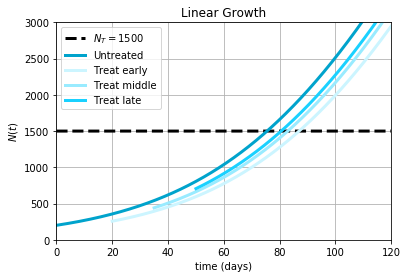

In [18]:
# parameter space 
# time_int_early = 20
# time_int_mid = 35
# time_int_late = 50

N_c = 100

# x-axis (timepoints)
t0 =  np.linspace(0, end_time, total_t)
t =  np.linspace(0, end_time, total_t)
t1 = np.linspace(time_int_early, end_time, int(((total_t-time_int_early)/total_t)*total_t)) # Create a vector or time points beginning after the early intervention of the way through to the final time point
t2 = np.linspace(time_int_mid, end_time, int(((total_t-time_int_mid)/total_t)*total_t))
t3 = np.linspace(time_int_late, end_time, int(((total_t-time_int_late)/total_t)*total_t))

# y-axis (tumor size)
N1500 = [1500 for i in range(total_t)] # straight line, denoting tumor burden leading to mortality


ystart_no_int = 200
N = odeint(model_lin, ystart_no_int, t)

index_t_early = next(x for x, val in enumerate(t) if val > time_int_early)
ystart_early_int = (N[index_t_early] - N_c)
N1 = odeint(model_lin, ystart_early_int, t1)

index_t_middle = next(x for x, val in enumerate(t) if val > time_int_mid)
ystart_middle_int = (N[index_t_middle] - N_c)
N2 = odeint(model_lin, ystart_middle_int, t2)


index_t_late = next(x for x, val in enumerate(t) if val > time_int_late)
ystart_late_int = (N[index_t_late] - N_c)
N3 = odeint(model_lin, ystart_late_int, t3)

plt.plot(t0,N1500, c = 'k', linestyle = '--',label='$N_T = 1500$',linewidth = 3.0)
plt.plot(t,N, c = '#00a3cc', label='Untreated',linewidth = 3.0)
plt.plot(t1,N1, c = '#ccf5ff', label='Treat early',linewidth = 3.0)
plt.plot(t2,N2, c = '#99ebff', label='Treat middle',linewidth = 3.0)
plt.plot(t3,N3, c = '#1ad1ff', label='Treat late',linewidth = 3.0)
plt.title("Linear Growth")
plt.xlabel('time (days)')
plt.ylabel('$N(t)$')
plt.grid()
plt.xlim((0,120))
plt.ylim((0,3000))
plt.legend(loc = 2)



plt.savefig(plot_path+'lin_curves.png', dpi = 500)


In [19]:
# # For N_T = 1000

# # Find index where N has just surpassed N_T
# index_N_1000 = next(x for x, val in enumerate(N) if val > 1000)
# index_N1_1000 = next(x for x, val in enumerate(N1) if val > 1000)
# index_N2_1000 = next(x for x, val in enumerate(N2) if val > 1000)
# index_N3_1000 = next(x for x, val in enumerate(N3) if val > 1000)

# # Find delta t between each intervention curve and the untreated curve at N_T
# delta_t1_N1000 = t1[index_N1_1000]-t[index_N_1000]
# delta_t2_N1000 = t2[index_N2_1000]-t[index_N_1000]
# delta_t3_N1000 = t3[index_N3_1000]-t[index_N_1000]

# delta_t_N1000.loc['Linear'] = [delta_t1_N1000, delta_t2_N1000, delta_t3_N1000]


# For N_T = 1500

index_N_1500 = next(x for x, val in enumerate(N) if val > 1500)
index_N1_1500 = next(x for x, val in enumerate(N1) if val > 1500)
index_N2_1500 = next(x for x, val in enumerate(N2) if val > 1500)
index_N3_1500 = next(x for x, val in enumerate(N3) if val > 1500)

delta_t1_N1500 = t1[index_N1_1500]-t[index_N_1500]
delta_t2_N1500 = t2[index_N2_1500]-t[index_N_1500]
delta_t3_N1500 = t3[index_N3_1500]-t[index_N_1500]

delta_t_N1500.loc['Linear'] = [delta_t1_N1500, delta_t2_N1500, delta_t3_N1500]

#### Surface

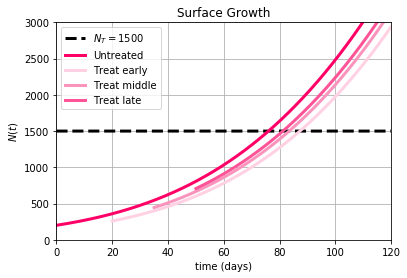

In [20]:
# parameter space 
# time_int_early = 20
# time_int_mid = 35
# time_int_late = 50

N_c = 100

# x-axis (timepoints)
t0 =  np.linspace(0, end_time, total_t)
t =  np.linspace(0, end_time, total_t)
t1 = np.linspace(time_int_early, end_time, int(((total_t-time_int_early)/total_t)*total_t)) # Create a vector or time points beginning after the early intervention of the way through to the final time point
t2 = np.linspace(time_int_mid, end_time, int(((total_t-time_int_mid)/total_t)*total_t))
t3 = np.linspace(time_int_late, end_time, int(((total_t-time_int_late)/total_t)*total_t))

# y-axis (tumor size)
N1500 = [1500 for i in range(total_t)] # straight line, denoting tumor burden leading to mortality


ystart_no_int = 200
N = odeint(model_surface, ystart_no_int, t)

index_t_early = next(x for x, val in enumerate(t) if val > time_int_early)
ystart_early_int = (N[index_t_early] - N_c)
N1 = odeint(model_surface, ystart_early_int, t1)

index_t_middle = next(x for x, val in enumerate(t) if val > time_int_mid)
ystart_middle_int = (N[index_t_middle] - N_c)
N2 = odeint(model_surface, ystart_middle_int, t2)


index_t_late = next(x for x, val in enumerate(t) if val > time_int_late)
ystart_late_int = (N[index_t_late] - N_c)
N3 = odeint(model_surface, ystart_late_int, t3)

plt.plot(t0,N1500, c = 'k', linestyle = '--',label='$N_T = 1500$',linewidth = 3.0)
plt.plot(t,N, c = '#ff0066', label='Untreated',linewidth = 3.0)
plt.plot(t1,N1, c = '#ffd1e3', label='Treat early',linewidth = 3.0)
plt.plot(t2,N2, c = '#fa94bd', label='Treat middle',linewidth = 3.0)
plt.plot(t3,N3, c = '#fd5397', label='Treat late',linewidth = 3.0)

plt.title("Surface Growth")
plt.xlabel('time (days)')
plt.ylabel('$N(t)$')
plt.grid()
plt.xlim((0,120))
plt.ylim((0,3000))
plt.legend(loc = 2)



plt.savefig(plot_path+'surface_curves.png', dpi = 500)


In [21]:
# # For N_T = 1000

# # Find index where N has just surpassed N_T
# index_N_1000 = next(x for x, val in enumerate(N) if val > 1000)
# index_N1_1000 = next(x for x, val in enumerate(N1) if val > 1000)
# index_N2_1000 = next(x for x, val in enumerate(N2) if val > 1000)
# index_N3_1000 = next(x for x, val in enumerate(N3) if val > 1000)

# # Find delta t between each intervention curve and the untreated curve at N_T
# delta_t1_N1000 = t1[index_N1_1000]-t[index_N_1000]
# delta_t2_N1000 = t2[index_N2_1000]-t[index_N_1000]
# delta_t3_N1000 = t3[index_N3_1000]-t[index_N_1000]

# delta_t_N1000.loc['Surface'] = [delta_t1_N1000, delta_t2_N1000, delta_t3_N1000]


# For N_T = 1500

index_N_1500 = next(x for x, val in enumerate(N) if val > 1500)
index_N1_1500 = next(x for x, val in enumerate(N1) if val > 1500)
index_N2_1500 = next(x for x, val in enumerate(N2) if val > 1500)
index_N3_1500 = next(x for x, val in enumerate(N3) if val > 1500)

delta_t1_N1500 = t1[index_N1_1500]-t[index_N_1500]
delta_t2_N1500 = t2[index_N2_1500]-t[index_N_1500]
delta_t3_N1500 = t3[index_N3_1500]-t[index_N_1500]

delta_t_N1500.loc['Surface'] = [delta_t1_N1500, delta_t2_N1500, delta_t3_N1500]



#### Gompertz

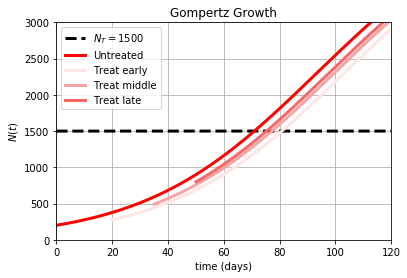

In [22]:
# parameter space 
# time_int_early = 20
# time_int_mid = 35
# time_int_late = 50

N_c = 100

# x-axis (timepoints)
t0 =  np.linspace(0, end_time, total_t)
t =  np.linspace(0, end_time, total_t)
t1 = np.linspace(time_int_early, end_time, int(((total_t-time_int_early)/total_t)*total_t)) # Create a vector or time points beginning after the early intervention of the way through to the final time point
t2 = np.linspace(time_int_mid, end_time, int(((total_t-time_int_mid)/total_t)*total_t))
t3 = np.linspace(time_int_late, end_time, int(((total_t-time_int_late)/total_t)*total_t))

# y-axis (tumor size)
N1500 = [1500 for i in range(total_t)] # straight line, denoting tumor burden leading to mortality

ystart_no_int = 200
N = odeint(model_gompertz, ystart_no_int, t)

index_t_early = next(x for x, val in enumerate(t) if val > time_int_early)
ystart_early_int = (N[index_t_early] - N_c)
N1 = odeint(model_gompertz, ystart_early_int, t1)

index_t_middle = next(x for x, val in enumerate(t) if val > time_int_mid)
ystart_middle_int = (N[index_t_middle] - N_c)
N2 = odeint(model_gompertz, ystart_middle_int, t2)

index_t_late = next(x for x, val in enumerate(t) if val > time_int_late)
ystart_late_int = (N[index_t_late] - N_c)
N3 = odeint(model_gompertz, ystart_late_int, t3)

plt.plot(t0,N1500, c = 'k', linestyle = '--',label='$N_T = 1500$',linewidth = 3.0)
plt.plot(t,N, c = '#ff0000', label='Untreated',linewidth = 3.0)
plt.plot(t1,N1, c = '#ffe5e5', label='Treat early',linewidth = 3.0)
plt.plot(t2,N2, c = '#f9a4a4', label='Treat middle',linewidth = 3.0)
plt.plot(t3,N3, c = '#f96767', label='Treat late',linewidth = 3.0)

plt.title("Gompertz Growth")
plt.xlabel('time (days)')
plt.ylabel('$N(t)$')
plt.grid()
plt.xlim((0,120))
plt.ylim((0,3000))
plt.legend(loc = 2)



plt.savefig(plot_path+'gompertz_curves.png', dpi = 500)


In [23]:
# # For N_T = 1000

# # Find index where N has just surpassed N_T
# index_N_1000 = next(x for x, val in enumerate(N) if val > 1000)
# index_N1_1000 = next(x for x, val in enumerate(N1) if val > 1000)
# index_N2_1000 = next(x for x, val in enumerate(N2) if val > 1000)
# index_N3_1000 = next(x for x, val in enumerate(N3) if val > 1000)

# # Find delta t between each intervention curve and the untreated curve at N_T
# delta_t1_N1000 = t1[index_N1_1000]-t[index_N_1000]
# delta_t2_N1000 = t2[index_N2_1000]-t[index_N_1000]
# delta_t3_N1000 = t3[index_N3_1000]-t[index_N_1000]

# delta_t_N1000.loc['Gompertz'] = [delta_t1_N1000, delta_t2_N1000, delta_t3_N1000]


# For N_T = 1500

index_N_1500 = next(x for x, val in enumerate(N) if val > 1500)
index_N1_1500 = next(x for x, val in enumerate(N1) if val > 1500)
index_N2_1500 = next(x for x, val in enumerate(N2) if val > 1500)
index_N3_1500 = next(x for x, val in enumerate(N3) if val > 1500)

delta_t1_N1500 = t1[index_N1_1500]-t[index_N_1500]
delta_t2_N1500 = t2[index_N2_1500]-t[index_N_1500]
delta_t3_N1500 = t3[index_N3_1500]-t[index_N_1500]

delta_t_N1500.loc['Gompertz'] = [delta_t1_N1500, delta_t2_N1500, delta_t3_N1500]



#### Bertalanffy

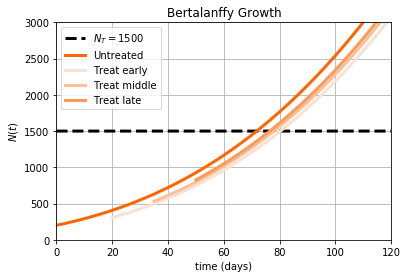

In [24]:
# parameter space 
# time_int_early = 20
# time_int_mid = 35
# time_int_late = 50

N_c = 100

# x-axis (timepoints)
t0 =  np.linspace(0, end_time, total_t)
t =  np.linspace(0, end_time, total_t)
t1 = np.linspace(time_int_early, end_time, int(((total_t-time_int_early)/total_t)*total_t)) # Create a vector or time points beginning after the early intervention of the way through to the final time point
t2 = np.linspace(time_int_mid, end_time, int(((total_t-time_int_mid)/total_t)*total_t))
t3 = np.linspace(time_int_late, end_time, int(((total_t-time_int_late)/total_t)*total_t))

# y-axis (tumor size)
N1500 = [1500 for i in range(total_t)] # straight line, denoting tumor burden leading to mortality

ystart_no_int = 200
N = odeint(model_bertalanffy, ystart_no_int, t)

index_t_early = next(x for x, val in enumerate(t) if val > time_int_early)
ystart_early_int = (N[index_t_early] - N_c)
N1 = odeint(model_bertalanffy, ystart_early_int, t1)

index_t_middle = next(x for x, val in enumerate(t) if val > time_int_mid)
ystart_middle_int = (N[index_t_middle] - N_c)
N2 = odeint(model_bertalanffy, ystart_middle_int, t2)

index_t_late = next(x for x, val in enumerate(t) if val > time_int_late)
ystart_late_int = (N[index_t_late] - N_c)
N3 = odeint(model_bertalanffy, ystart_late_int, t3)

plt.plot(t0,N1500, c = 'k', linestyle = '--',label='$N_T = 1500$',linewidth = 3.0)
plt.plot(t,N, c = '#ff6600', label='Untreated',linewidth = 3.0)
plt.plot(t1,N1, c = '#f7e2d4', label='Treat early',linewidth = 3.0)
plt.plot(t2,N2, c = '#fdbf96', label='Treat middle',linewidth = 3.0)
plt.plot(t3,N3, c = '#fb9b5b', label='Treat late',linewidth = 3.0)
plt.title("Bertalanffy Growth")
plt.xlabel('time (days)')
plt.ylabel('$N(t)$')
plt.grid()
plt.xlim((0,120))
plt.ylim((0,3000))
plt.legend(loc = 2)


plt.savefig(plot_path+'bertalanffy_curves.png', dpi = 500)


In [25]:
# # For N_T = 1000

# # Find index where N has just surpassed N_T
# index_N_1000 = next(x for x, val in enumerate(N) if val > 1000)
# index_N1_1000 = next(x for x, val in enumerate(N1) if val > 1000)
# index_N2_1000 = next(x for x, val in enumerate(N2) if val > 1000)
# index_N3_1000 = next(x for x, val in enumerate(N3) if val > 1000)

# # Find delta t between each intervention curve and the untreated curve at N_T
# delta_t1_N1000 = t1[index_N1_1000]-t[index_N_1000]
# delta_t2_N1000 = t2[index_N2_1000]-t[index_N_1000]
# delta_t3_N1000 = t3[index_N3_1000]-t[index_N_1000]

# delta_t_N1000.loc['Bertalanffy'] = [delta_t1_N1000, delta_t2_N1000, delta_t3_N1000]


# For N_T = 1500

index_N_1500 = next(x for x, val in enumerate(N) if val > 1500)
index_N1_1500 = next(x for x, val in enumerate(N1) if val > 1500)
index_N2_1500 = next(x for x, val in enumerate(N2) if val > 1500)
index_N3_1500 = next(x for x, val in enumerate(N3) if val > 1500)

delta_t1_N1500 = t1[index_N1_1500]-t[index_N_1500]
delta_t2_N1500 = t2[index_N2_1500]-t[index_N_1500]
delta_t3_N1500 = t3[index_N3_1500]-t[index_N_1500]

delta_t_N1500.loc['Bertalanffy'] = [delta_t1_N1500, delta_t2_N1500, delta_t3_N1500]


Let's take a look at our final table of delta t values for N<sub>T</sub>=1000 and N<sub>T</sub>=2000.

In [26]:
print("NT=1500")
print(tabulate(delta_t_N1500, headers='keys', tablefmt='fancy_grid'))

NT=1500
╒═════════════╤═══════════════╤════════════════╤══════════════╕
│             │   Treat Early │   Treat Middle │   Treat Late │
╞═════════════╪═══════════════╪════════════════╪══════════════╡
│ Exponential │      14.8308  │        9.65195 │      6.42153 │
├─────────────┼───────────────┼────────────────┼──────────────┤
│ Mendelsohn  │      10.226   │        7.03328 │      5.06641 │
├─────────────┼───────────────┼────────────────┼──────────────┤
│ Logistic    │      11.8179  │        7.55965 │      5.09609 │
├─────────────┼───────────────┼────────────────┼──────────────┤
│ Linear      │      11.4861  │        7.41475 │      5.07139 │
├─────────────┼───────────────┼────────────────┼──────────────┤
│ Surface     │      11.2579  │        7.40523 │      5.16068 │
├─────────────┼───────────────┼────────────────┼──────────────┤
│ Gompertz    │       9.84522 │        6.27084 │      4.35776 │
├─────────────┼───────────────┼────────────────┼──────────────┤
│ Bertalanffy │       8.52978 │ 

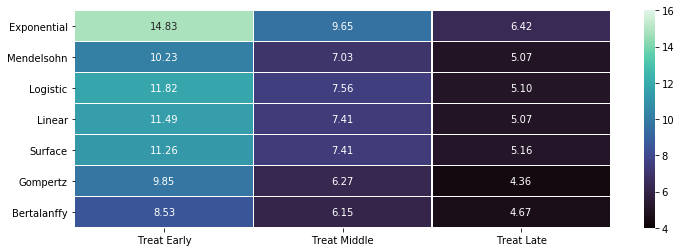

In [31]:
plt.figure(figsize=(12,4))
ax = sns.heatmap(delta_t_N1500.astype(float), annot = True, fmt = ".2f", 
                 cmap = "mako", linewidths = 0.5, linecolor = "white",
                 vmin = 4, vmax = 16)
plt.savefig(plot_path+'ode_delta_table.png', dpi = 500)

# Plot parameter sensitivity and growth curves with exponential model

## Parameter space

In [ ]:
tumor_doubling_time = [100, 200, 300, 400] 
r = [ln(2) / tumor_doubling_time[i] for i in range(len(tumor_doubling_time))]
size = 500
N_d = np.logspace(9, 13, size)
N_c = np.logspace(9, 13, size)
Delta_t1 =  np.zeros([size, size, len(r)]) 

## Calculate change in OS across parameter space

In [ ]:
for k in range(len(r)):
    for i in range(size):
        for j in range(size):
            if N_c[j] >= N_d[i]:
                Delta_t1[j,i,k] = 0
            else:
                Delta_t1[j,i,k] = (1/r[k]) * (ln (N_d[i] / (N_d[i] - N_c[j])) )

## Plot change in OS across parameter space

In [ ]:
rcParams['figure.figsize'] = 13,11

for i in range(len(tumor_doubling_time)):
    plt.subplot(2, 2, i+1)
    heatmap = plt.pcolor(N_d, N_c, Delta_t1[:,:,i], cmap='viridis', norm=LogNorm())
    plt.title('OS benefit, $t_d$ = '+str(tumor_doubling_time[i])+' days')
    plt.xlabel('$N_d$')
    plt.ylabel('$N_c$')
    cbar = plt.colorbar()
    cbar.set_label('Days', rotation = 90)
    plt.xscale('log')
    plt.yscale('log')
    plt.clim(10**-1,10**3)
    plt.grid()
    #
    X, Y = np.meshgrid(N_d,N_c)
    #
    def iso_survival(X,Y,i):
    # if X < Y:
        # return 0
    # else:
        return (1/r[i]) * np.log(X/(X-Y))
    Z = iso_survival(X,Y,i) 
    
    # Create a simple contour plot with labels using default colors.  The
    # inline argument to clabel will control whether the labels are draw
    # over the line segments of the contour, removing the lines beneath
    # the label
    CS = plt.contour(X, Y, Z, linewidths = 2, colors= 'k', levels=[1, 3, 10, 30, 100, 300, 1000])
    plt.clabel(CS, inline=1, fontsize=10, fmt='%1.0f')

plt.suptitle("Figure 2: Change in OS by cells killed, tumor burden, and tumor doubling time", y = 0.98);


plt.savefig(plot_path+'oligomets_sens_4plot.png', dpi = 500)
